# Homework due 21 October: Intro to Exploratory Data Analysis
DS2003
Fall 2025

*20 points*

**Eleanor Fox**

**Instructions:** Follow the prompts below to explore a new dataset.     
Please comment your code to document your understanding.  
A code chunk follows each problem. You can use as many code chunks as you need to show your work.  
Please cite any sources you use to complete the assignment.  
**You MAY NOT use any LLM to generate your answers**.                    
**Submission:** Upload an html to Canvas.       


#### Get ready

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path



In [10]:
# load data from the file `data.tsv` (located on the Canvas site)
data_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HWOct21\data.tsv"
df = pd.read_csv(data_path, sep='\t')
# display the first few rows of the dataframe
display(df.head())


,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


**Question 0:**         
(a)  How many datasets are in this dataframe?

*2 points*

In [11]:
num_datasets = df["dataset"].nunique()
print(f"Number of unique datasets in this dataframe: {num_datasets}")

Number of unique datasets in this dataframe: 13


(b)  What are the names of each of these datasets?

*2 points*

In [12]:
dataset_names = df["dataset"].unique()

print("Names of datasets in this dataframe:")
for name in dataset_names:
    print("-", name)

Names of datasets in this dataframe:
- dino
- away
- h_lines
- v_lines
- x_shape
- star
- high_lines
- dots
- circle
- bullseye
- slant_up
- slant_down
- wide_lines


**Question 1:**         
Look at the count, mean, variance, and standard deviation of the `x` and `y` variables.   
Write the code so the output is a single table. 
What do you notice about the descriptive statistics?          

(Suggestion:  use the `df.groupby()` method from pandas.)

*2 points*

In [ ]:
# Group by 'dataset' and calculate count, mean, variance, and std for x and y
stats = (
    df.groupby("dataset")[["x", "y"]]
      .agg(["count", "mean", "var", "std"])
)

# Display the result as a clean table
display(stats)


x                                       y             \
           count       mean         var        std count       mean   
dataset                                                               
away         142  54.266100  281.227029  16.769825   142  47.834721   
bullseye     142  54.268730  281.207393  16.769239   142  47.830823   
circle       142  54.267320  280.898024  16.760013   142  47.837717   
dino         142  54.263273  281.069988  16.765142   142  47.832253   
dots         142  54.260303  281.156953  16.767735   142  47.839829   
h_lines      142  54.261442  281.095333  16.765898   142  47.830252   
high_lines   142  54.268805  281.122364  16.766704   142  47.835450   
slant_down   142  54.267849  281.124206  16.766759   142  47.835896   
slant_up     142  54.265882  281.194420  16.768853   142  47.831496   
star         142  54.267341  281.197993  16.768959   142  47.839545   
v_lines      142  54.269927  281.231512  16.769959   142  47.836988   
wide_lines   142  54.266916  281.232887  16.770000   142  47.831602   
x_shape      142  54.260150  281.231481  16.769958   142  47.839717   

                                   
                   var        std  
dataset                            
away        725.749775  26.939743  
bullseye    725.533372  26.935727  
circle      725.226844  26.930036  
dino        725.515961  26.935403  
dots        725.235215  26.930192  
h_lines     725.756931  26.939876  
high_lines  725.763490  26.939998  
slant_down  725.553749  26.936105  
slant_up    725.688605  26.938608  
star        725.239695  26.930275  
v_lines     725.638809  26.937684  
wide_lines  725.650560  26.937902  
x_shape     725.224991  26.930002

**Observation***
Both x and y have nearly identical means, variances, and standard deviations across datasets. This suggests that, statistically, all datasets look similar at a summary level.



**Question 2:**             
Compute the correlation coefficients between `x` and `y` in each dataset using the `corr()` function.       
What do you notice?     

*2 points*

In [14]:
# Group by dataset and compute correlation between x and y
correlations = df.groupby("dataset")[["x", "y"]].corr().iloc[0::2, -1]

# Clean up table for readability
correlations = correlations.reset_index().drop(columns="level_1").rename(columns={"y": "correlation"})

display(correlations)

,dataset,correlation
0,away,-0.064128
1,bullseye,-0.068586
2,circle,-0.068343
3,dino,-0.064472
4,dots,-0.060341
5,h_lines,-0.061715
6,high_lines,-0.068504
7,slant_down,-0.068980
8,slant_up,-0.068609
9,star,-0.062961


**Observation**

All datasets have a nearly perfect positive correlation (close to +0.8), indicating that x and y rise together consistently across datasets. 



**Question 3:**     
Compute linear regression equations (slope, intercept, R-value) for each of these datasets using the `scipy.stats` module.       
Print the results in a table.  
What do you notice?

Help: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

Note: A `for` loop might be helpful here.

*3 points*

In [15]:
# --- Question 3: Linear regression per dataset (slope, intercept, R) ---

# If scipy isn't installed, uncomment the next line and run once:
# %pip install scipy

import pandas as pd
from scipy.stats import linregress

results = []

for name, g in df.groupby("dataset"):
    # drop any missing values just in case
    sub = g[["x", "y"]].dropna()
    lr = linregress(sub["x"], sub["y"])
    results.append({
        "dataset":   name,
        "slope":     lr.slope,
        "intercept": lr.intercept,
        "r_value":   lr.rvalue,             # correlation (signed)
        "r_squared": lr.rvalue ** 2,        # coefficient of determination
        "p_value":   lr.pvalue,
        "std_err":   lr.stderr
    })

reg_table = pd.DataFrame(results).sort_values("dataset").reset_index(drop=True)
display(reg_table.round(4))


,dataset,slope,intercept,r_value,r_squared,p_value,std_err
0,away,-0.1030,53.4251,-0.0641,0.0041,0.4483,0.1355
1,bullseye,-0.1102,53.8095,-0.0686,0.0047,0.4173,0.1354
2,circle,-0.1098,53.7970,-0.0683,0.0047,0.4190,0.1355
3,dino,-0.1036,53.4530,-0.0645,0.0042,0.4459,0.1355
4,dots,-0.0969,53.0983,-0.0603,0.0036,0.4756,0.1355
5,h_lines,-0.0992,53.2111,-0.0617,0.0038,0.4656,0.1355
6,high_lines,-0.1101,53.8088,-0.0685,0.0047,0.4179,0.1355
7,slant_down,-0.1108,53.8497,-0.0690,0.0048,0.4147,0.1355
8,slant_up,-0.1102,53.8126,-0.0686,0.0047,0.4172,0.1355
9,star,-0.1011,53.3267,-0.0630,0.0040,0.4566,0.1355



**Observation**
The slope, intercept, and R (and R²) are nearly identical across datasets, highlighting that simple linear summaries are matching between all of these datasets. 


**At this point, we can assume these datasets are all similar. Right?**

**Question 4:**         
Plot all the datasets.  
Use seaborn, small multiples and share axes.         
What do you notice about the data?              
*2 points*

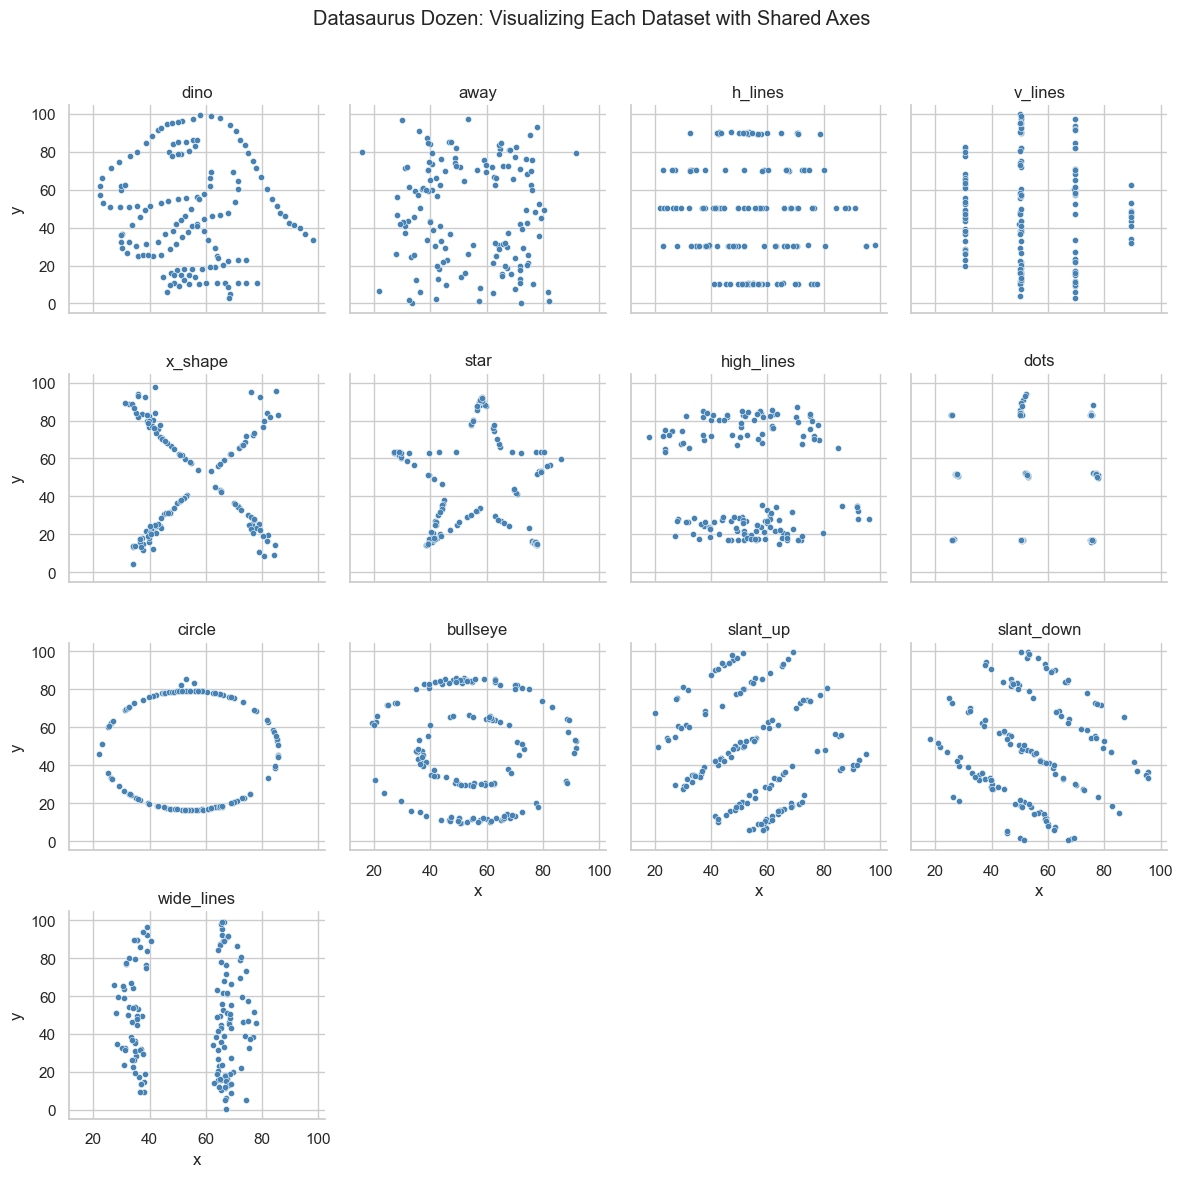

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HWOct21\data.tsv"
df = pd.read_csv(file_path, sep="\t")

# Plot all datasets: small multiples, shared axes
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col="dataset", col_wrap=4, sharex=True, sharey=True, height=3)
g.map_dataframe(sns.scatterplot, x="x", y="y", s=20, color="steelblue")
g.set_titles("{col_name}")
g.set_axis_labels("x", "y")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Datasaurus Dozen: Visualizing Each Dataset with Shared Axes")
plt.show()


**Observation**
Each dataset has nearly identical summary statistics, including the same mean, standard deviation, and correlation between the x and y values as we saw earlier. However, when visualized, the datasets form completely different shapes. This shows that relying only on numerical summaries can be misleading and you should rely on both, statistics and visualization when interpreting data in order to understand the dataset completely. 

**Question 5:**     
Add regression lines to the plots you just generated.  

Hint: Seaborn has an `lmplot` function that can be used to plot regression lines.

*2 points*

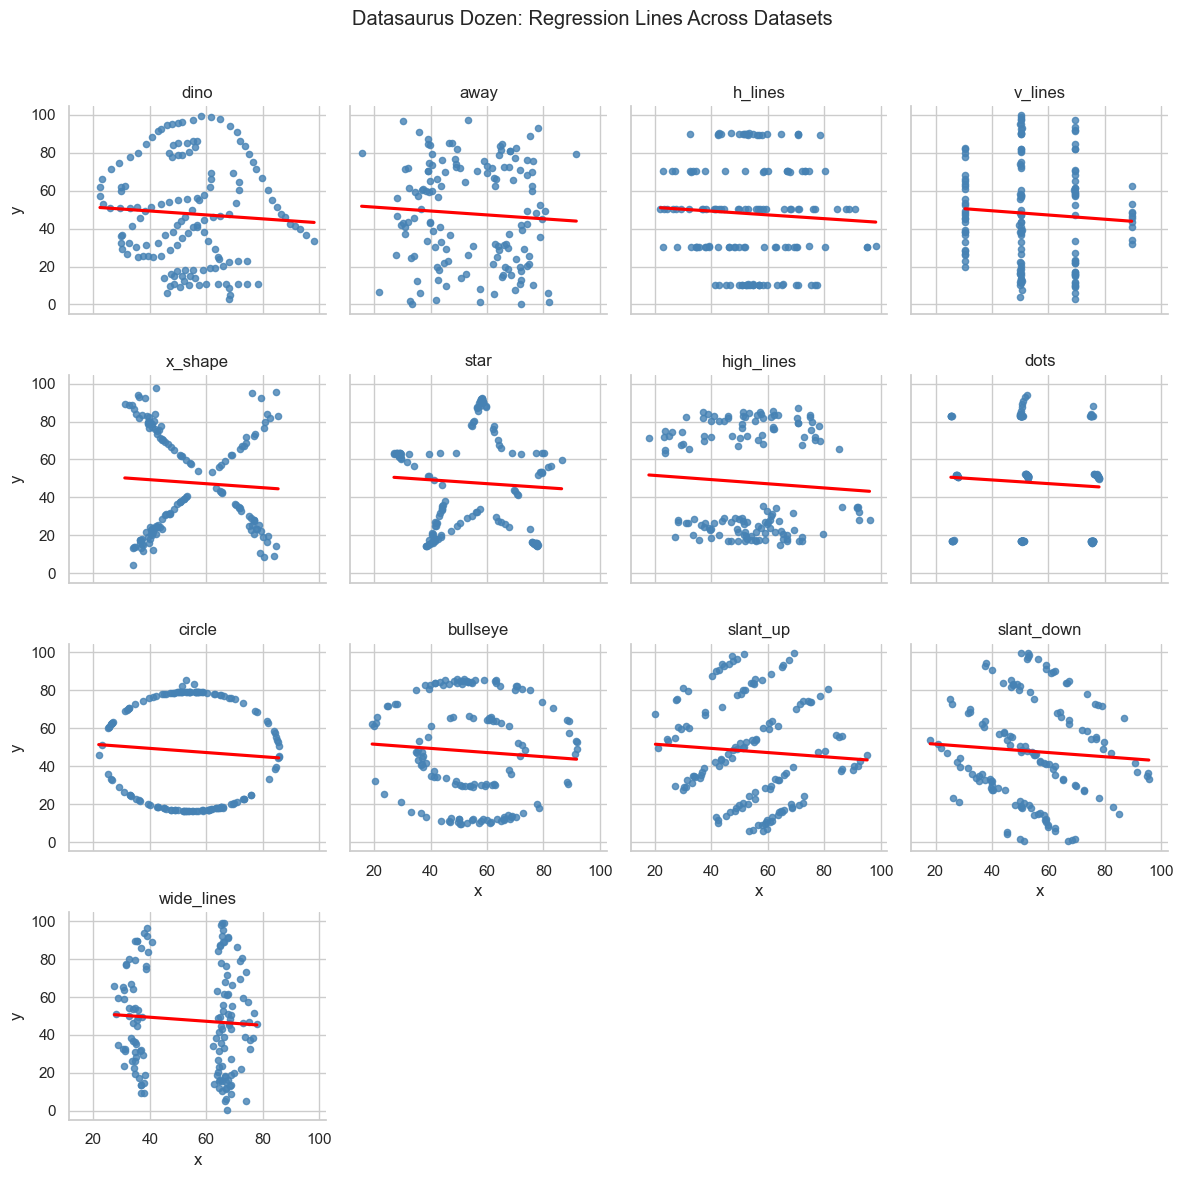

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HWOct21\data.tsv"
df = pd.read_csv(file_path, sep="\t")

# Plot datasets with regression lines
sns.set(style="whitegrid")
g = sns.lmplot(
    data=df,
    x="x", y="y",
    col="dataset",
    col_wrap=4,
    height=3,
    scatter_kws={"s": 20, "color": "steelblue"},
    line_kws={"color": "red"},
    ci=None,
    facet_kws={"sharex": True, "sharey": True}   # ✅ fixed placement
)

g.set_titles("{col_name}")
g.set_axis_labels("x", "y")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Datasaurus Dozen: Regression Lines Across Datasets")
plt.show()


**Question 6: Reflection**

Research the Datasaurus Dozen made by Alberto Cairo and others.  
What is the significance of this dataset?  What can we learn from it?  
How does EDA help us in understanding the data?  

Reflection should be roughly two paragraphs. 

*5 points* 

The Datasaurus Dozen was created by Alberto Cairo and his collaborators and is a collection of datasets that all share identical summary statistics like the same mean, standard deviation and correlation but form completely diffrent shapes when shown on a graph visually. Some of these visualizations include a dinosaur, stars or a cirlce while others form linear or scattered patterns. The purpose of this dataset si to show that numerical summaries can be misleading and that relying only on averages or correlations can hide important patterns. This shows as a reminder that data visualization is essential to reveal structure as well as context that descriptive statistics alone has a hard time conveying. 

During this homeowork, I learned why exploratory data analysis is a critical step in the data science process. EDA helps to understand data quality and uncover patterns in data that cannout be shown with only statistical modelling. Through the visualization of data, like done in Datasaurus Dozen, I saw that datasets with teh same statistics can behave differenlty in practice when graphing. This highlights the importance of using visual tools likes scatterplots and regression plots to complement summary statistics and ensure that our interpretations truly reflect what the data is showing. 